In [6]:
#Importing libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [7]:
#Displaying Orignal Images
def show_orignal_images(pixels):
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

In [8]:
#Displaying Eigenfaces
def show_eigenfaces(pca):
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()

In [9]:
## Step 1: Read dataset and set the target variable 
df= pd.read_excel("C:/Users/DEBNARAYAN/Desktop/face in python/face.xlsx")
targets = df["target"]
pixels = df.drop(["target"],axis=1)
print(df.shape)

(400, 4097)


In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


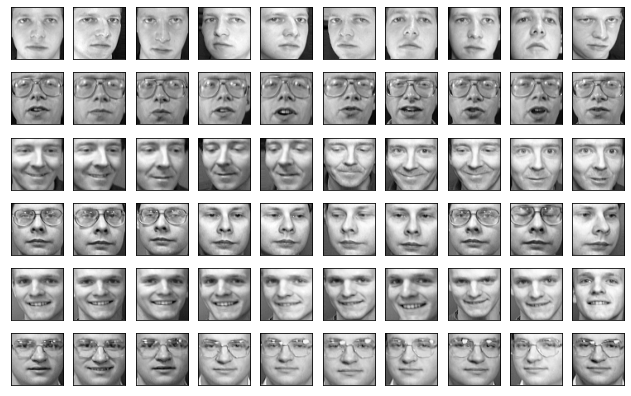

In [11]:
show_orignal_images(pixels)

In [12]:
## Step 2: Split Dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(pixels,targets,test_size = 0.7)
print(x_train.shape)
print(x_test.shape)


(120, 4096)
(280, 4096)


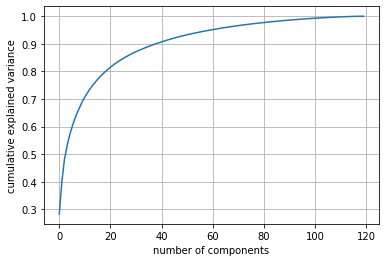

In [15]:
## Step 3: Perform PCA.
pca = PCA(n_components=120).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

#show_eigenfaces(pca)

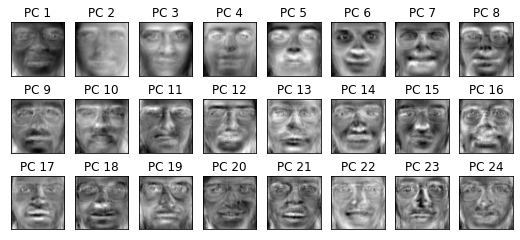

In [16]:
show_eigenfaces(pca)


In [17]:
## Step 4: Project Training data to PCA
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)
Xtrain_pca.shape

Projecting the input data on the eigenfaces orthonormal basis


(120, 120)

## Applying KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(Xtrain_pca,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
## Step 6: Perform testing and get classification report
from sklearn.metrics import accuracy_score
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = model.predict(Xtest_pca)
#print("done in %0.3fs" % (time() - t0))
print("The accuracy of the model is : {} %".format(accuracy_score(y_test, y_pred)*100))

Predicting people's names on the test set
The accuracy of the model is : 42.857142857142854 %


## Applying SVM

In [20]:
## Step 5: Initialize Classifer and fit training data
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)

In [21]:
x_test_pca = pca.transform(x_test)
y_pred = clf.predict(x_test_pca)
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       1.00      1.00      1.00         6
           2       0.23      1.00      0.38         3
           3       0.25      1.00      0.40         4
           4       0.40      0.86      0.55         7
           5       1.00      0.80      0.89         5
           6       1.00      0.62      0.77         8
           7       1.00      0.75      0.86         8
           8       0.42      1.00      0.59         5
           9       0.80      0.80      0.80         5
          10       1.00      1.00      1.00         5
          11       1.00      0.22      0.36         9
          12       0.00      0.00      0.00         9
          13       0.78      1.00      0.88         7
          14       1.00      0.33      0.50         9
          15       0.83      0.83      0.83         6
          16       0.71      0.71      0.71         7
          17       0.00    

C:\Users\DEBNARAYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEBNARAYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEBNARAYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# # Applying Random Forest:

In [22]:
#split the model train and test model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1),targets,test_size=0.3)

In [23]:
# find out the train model lenth
len(x_train)


280

In [24]:
# find out the test model lenth
len(x_test)

120

In [25]:
# import random forest libary
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
# find the accuracy of the model
model.score (x_test, y_test)

0.9166666666666666

In [27]:
#try to predict 
y_predicted = model.predict(x_test)

In [28]:
# import the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 4, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

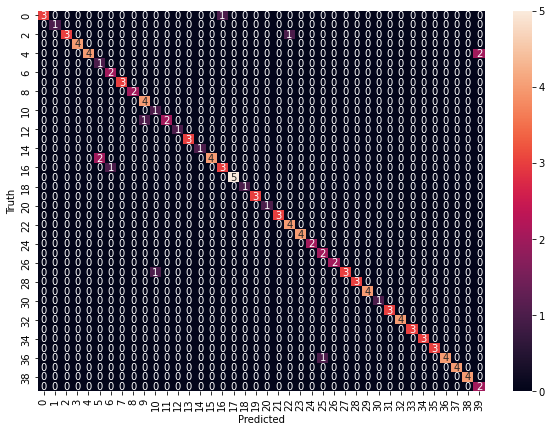

In [30]:
#import cborn visualization libary
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# # Applying Decision Tree:

In [31]:
#separating indepndent and dependent variables
y = df["target"]
x = df.drop(["target"], axis =1)

In [32]:
#import train_split and testing split
from sklearn.model_selection import train_test_split

In [33]:
#create the train and validation set
x_train, x_valid, y_train, y_valid= train_test_split(x, y, random_state= 101, stratify=y,test_size=0.25)

In [34]:
#distribution in validation set
y_train.value_counts(normalize=True)

25    0.026667
22    0.026667
1     0.026667
27    0.026667
34    0.026667
2     0.026667
10    0.026667
26    0.026667
24    0.026667
35    0.026667
28    0.026667
16    0.026667
18    0.026667
20    0.026667
33    0.026667
7     0.026667
3     0.026667
32    0.026667
30    0.026667
36    0.026667
8     0.023333
11    0.023333
19    0.023333
17    0.023333
5     0.023333
6     0.023333
15    0.023333
23    0.023333
39    0.023333
31    0.023333
0     0.023333
13    0.023333
37    0.023333
38    0.023333
21    0.023333
4     0.023333
9     0.023333
29    0.023333
14    0.023333
12    0.023333
Name: target, dtype: float64

In [35]:
#distribution in training set
x_train.shape, y_train.shape


((300, 4096), (300,))

In [36]:
#shape of validation set
x_train.shape, y_valid.shape

((300, 4096), (100,))

In [37]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor 

In [39]:
#create a decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [40]:
#fitting the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [41]:
#cheaking the traing score
dt_model.score(x_train, y_train)

1.0

In [42]:
#chaking the True accuracy 
dt_model.score(x_test, y_test)*100


91.66666666666666

In [43]:
#predictions on validation set
dt_model.predict(x_valid)


array([32,  1, 24, 18, 15, 15, 38, 27, 22,  5,  7,  8,  9, 39, 17,  4, 28,
       38, 17, 23, 38, 35, 27, 23, 21,  4, 37, 13,  8, 13,  2, 26, 12, 38,
       31, 19,  7,  5, 15,  8,  5,  4, 29, 20, 35, 26, 11, 19, 14, 27, 34,
       37, 39, 15, 26, 11, 11, 10, 22, 13,  8,  4,  9, 33, 25, 32, 32,  3,
       23, 37, 14, 17, 39, 38, 19,  1, 23, 20, 12, 36, 27,  8, 12, 38, 13,
        2, 12, 14, 13, 16, 12,  6, 33,  9, 25, 29,  0,  1,  6, 18],
      dtype=int64)

In [44]:
dt_model.predict_proba(x_valid)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
y_pred = dt_model.predict_proba(x_valid)[:,1]

In [46]:
# using the threhold
new_y = []
for i in range (len(y_pred)):
    if y_pred[i]<0.6:
        new_y.append(0)
    else:
            new_y.append(1)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_valid, new_y)*1000

40.0